In [35]:
import pandas as pd

In [36]:
weather=pd.read_csv('Weather Training Data.csv')
weather.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [37]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [38]:
#verifying percentage of missing values
weather.isnull().mean()*100

row ID            0.000000
Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

In [39]:
#removing feature row_id
weather=weather.drop(['row ID'],axis=1)

In [40]:
#fill missing continous features
continous_columns = weather.select_dtypes(include=['float64','int64']).columns
for c in continous_columns:
    mean = weather[c].mean()
    weather[c]=weather[c].fillna(mean)

#fill missing categorical features
categorical_columns = weather.select_dtypes(include=['object']).columns
for c in categorical_columns:
    most_frequent_value = weather[c].mode()[0]
    weather[c]=weather[c].fillna(most_frequent_value)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99516 non-null  float64
 2   MaxTemp        99516 non-null  float64
 3   Rainfall       99516 non-null  float64
 4   Evaporation    99516 non-null  float64
 5   Sunshine       99516 non-null  float64
 6   WindGustDir    99516 non-null  object 
 7   WindGustSpeed  99516 non-null  float64
 8   WindDir9am     99516 non-null  object 
 9   WindDir3pm     99516 non-null  object 
 10  WindSpeed9am   99516 non-null  float64
 11  WindSpeed3pm   99516 non-null  float64
 12  Humidity9am    99516 non-null  float64
 13  Humidity3pm    99516 non-null  float64
 14  Pressure9am    99516 non-null  float64
 15  Pressure3pm    99516 non-null  float64
 16  Cloud9am       99516 non-null  float64
 17  Cloud3pm       99516 non-null  float64
 18  Temp9a

In [41]:
#Converting Yes to 1 and No to 0 rainToday
weather.loc[weather.RainToday == 'Yes',"RainToday"] = 1
weather.loc[weather.RainToday == 'No',"RainToday"] = 0
weather['RainToday'] = weather['RainToday'].astype(int)
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [42]:
#One hot encoding
one_hot_weather = pd.get_dummies(weather[categorical_columns.array])
one_hot_weather.head()

,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
weather = pd.concat([weather[continous_columns.array], one_hot_weather], axis=1)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,...,False,False,False,False,False,False,False,True,False,False
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,...,False,False,False,False,False,False,False,True,False,False


In [44]:
#Correlation 
weather_corr = weather.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734449,0.103347,0.358375,0.053518,0.174879,0.177037,0.172645,-0.235020,0.004329,...,-0.070841,-0.063972,-0.011599,0.056401,0.023793,-0.035708,-0.046090,-0.078744,-0.046073,-0.059135
MaxTemp,0.734449,1.000000,-0.073583,0.447584,0.331618,0.069864,0.017958,0.050423,-0.501493,-0.500325,...,-0.009106,-0.007303,-0.057861,0.006588,-0.012940,-0.062098,-0.055131,-0.070555,-0.026208,-0.059769
Rainfall,0.103347,-0.073583,1.000000,-0.039140,-0.171406,0.127677,0.087206,0.060072,0.219696,0.248604,...,-0.019310,-0.005525,0.019872,0.010470,0.013388,0.025189,0.011413,0.016227,0.009919,0.012508
Evaporation,0.358375,0.447584,-0.039140,1.000000,0.292557,0.150608,0.143145,0.093413,-0.380420,-0.291679,...,-0.029717,-0.018793,-0.010011,0.013631,0.017389,-0.007608,0.001833,-0.025697,-0.024420,-0.009999
Sunshine,0.053518,0.331618,-0.171406,0.292557,1.000000,-0.019216,0.008317,0.039623,-0.350935,-0.446119,...,-0.019054,-0.009157,-0.029154,0.000825,-0.012564,-0.017939,0.020497,-0.014561,-0.010444,0.008384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035708,-0.062098,0.025189,-0.007608,-0.017939,-0.006217,0.010992,-0.009039,0.027116,0.027926,...,-0.058569,-0.061256,-0.065211,-0.081693,-0.063798,1.000000,-0.064144,-0.066484,-0.062056,-0.065143
WindDir3pm_SW,-0.046090,-0.055131,0.011413,0.001833,0.020497,0.007115,-0.003023,0.006444,-0.004957,-0.007709,...,-0.063293,-0.066197,-0.070471,-0.088281,-0.068943,-0.064144,1.000000,-0.071846,-0.067061,-0.070397
WindDir3pm_W,-0.078744,-0.070555,0.016227,-0.025697,-0.014561,0.087990,0.027363,0.059178,0.002357,-0.018787,...,-0.065601,-0.068611,-0.073041,-0.091501,-0.071458,-0.066484,-0.071846,1.000000,-0.069507,-0.072965
WindDir3pm_WNW,-0.046073,-0.026208,0.009919,-0.024420,-0.010444,0.084901,0.014906,0.056502,-0.002095,-0.034151,...,-0.061232,-0.064042,-0.068176,-0.085407,-0.066699,-0.062056,-0.067061,-0.069507,1.000000,-0.068105


In [45]:
#Features selection from weather Data
cor_target = abs(weather_corr["RainTomorrow"])

relevant_features = cor_target[cor_target>0.20]
relevant_features

Rainfall         0.236476
Sunshine         0.326659
WindGustSpeed    0.225439
Humidity9am      0.254008
Humidity3pm      0.438649
Pressure9am      0.235220
Pressure3pm      0.215813
Cloud9am         0.252877
Cloud3pm         0.297873
RainTomorrow     1.000000
RainToday        0.304991
Name: RainTomorrow, dtype: float64

In [ ]:
train_data = weather[relevant_features.index.array]

train_data.head()


,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow,RainToday
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

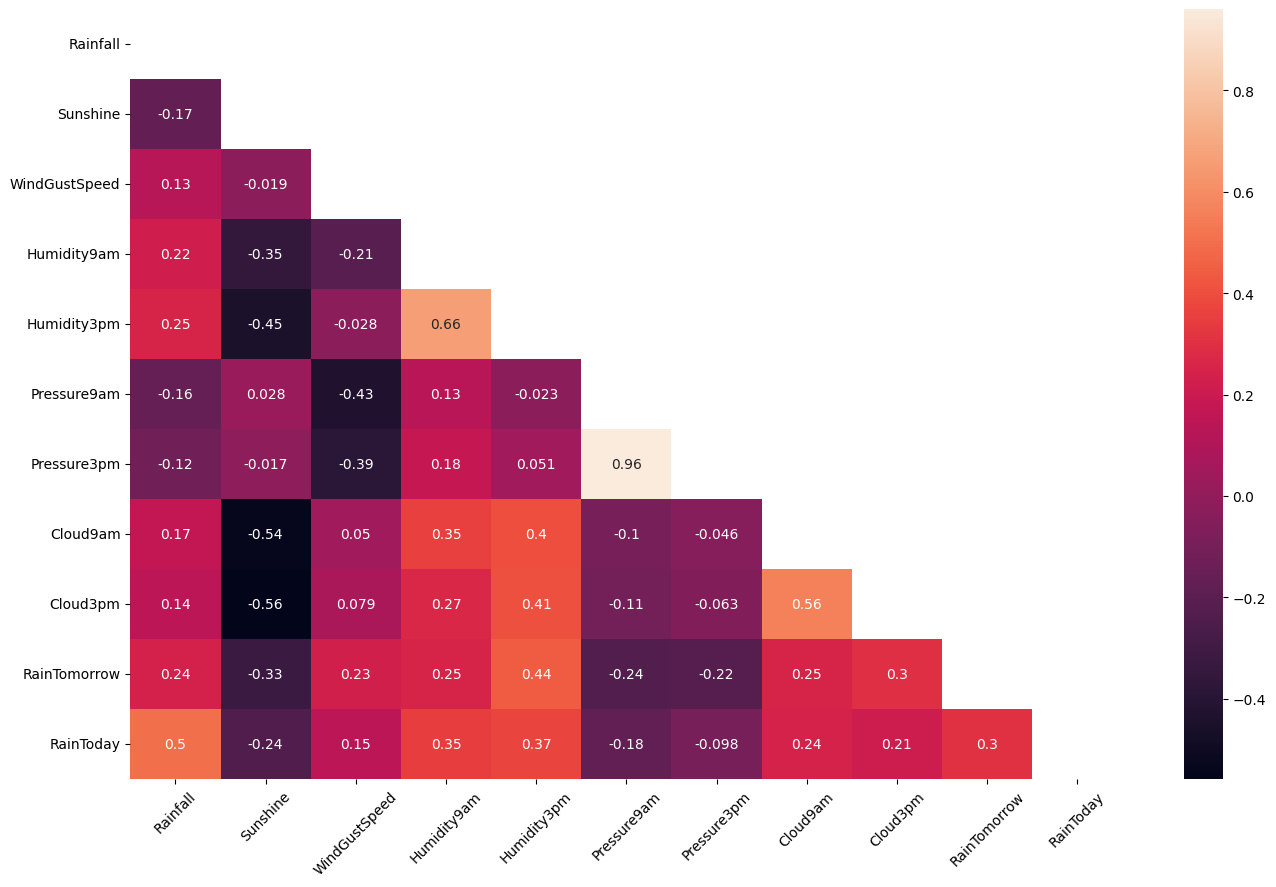

In [52]:
final_train_corr = train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

In [53]:
#split features and target
X=train_data.drop(['RainTomorrow'], axis=1)
y=train_data['RainTomorrow']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)


(79612, 10) (19904, 10) (79612,) (19904,)


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
dtree_model.predict(X_val)

array([0, 1, 0, ..., 1, 0, 1])

In [57]:
dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The classification accuracy of Decision Tree model is 77.72%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

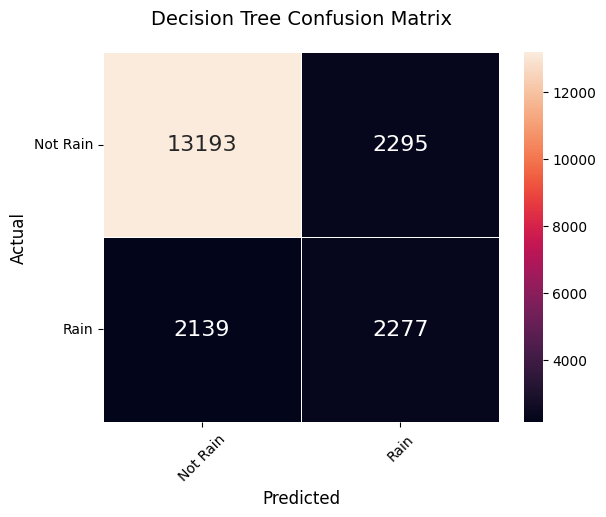

In [ ]:
#Confussion Matrix
from sklearn.metrics import confusion_matrix

y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)